In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('sales_data_sample.csv', encoding ='latin1')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [3]:
df = df.drop(['CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'ORDERNUMBER'], axis = 1)
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE
0,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Small
1,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,...,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Small
2,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,...,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Medium
3,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,...,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Medium
4,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,...,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   STATUS           2823 non-null   object 
 6   QTR_ID           2823 non-null   int64  
 7   MONTH_ID         2823 non-null   int64  
 8   YEAR_ID          2823 non-null   int64  
 9   PRODUCTLINE      2823 non-null   object 
 10  MSRP             2823 non-null   int64  
 11  PRODUCTCODE      2823 non-null   object 
 12  CUSTOMERNAME     2823 non-null   object 
 13  PHONE            2823 non-null   object 
 14  ADDRESSLINE1     2823 non-null   object 
 15  ADDRESSLINE2     302 non-null    object 
 16  CITY             2823 non-null   object 
 17  STATE         

In [5]:
df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE
0,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Small
1,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,...,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Small
2,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,...,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Medium
3,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,...,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Medium
4,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,...,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,...,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Small
2819,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,...,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Medium
2820,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,...,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Medium
2821,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,...,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Small


In [6]:
df = df.drop(['ORDERDATE', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2'], axis = 1)
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE
0,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,NY,10022,USA,NaN,Small
1,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,NaN,51100,France,EMEA,Small
2,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,NaN,75508,France,EMEA,Medium
3,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,CA,90003,USA,NaN,Medium
4,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,CA,NaN,USA,NaN,Medium


In [7]:
df['CUSTOMERNAME'].unique()

array(['Land of Toys Inc.', 'Reims Collectables', 'Lyon Souveniers',
       'Toys4GrownUps.com', 'Corporate Gift Ideas Co.',
       'Technics Stores Inc.', 'Daedalus Designs Imports', 'Herkku Gifts',
       'Mini Wheels Co.', 'Auto Canal Petit',
       'Australian Collectors, Co.', 'Vitachrome Inc.',
       'Tekni Collectables Inc.', 'Gift Depot Inc.', 'La Rochelle Gifts',
       "Marta's Replicas Co.", 'Toys of Finland, Co.',
       'Baane Mini Imports', 'Diecast Classics Inc.',
       'Salzburg Collectables', 'Souveniers And Things Co.',
       'FunGiftIdeas.com', 'UK Collectables, Ltd.',
       'Euro Shopping Channel', 'Volvo Model Replicas, Co',
       'Corrida Auto Replicas, Ltd', 'Dragon Souveniers, Ltd.',
       'Classic Legends Inc.', 'Australian Gift Network, Co',
       'Classic Gift Ideas, Inc', 'Saveley & Henriot, Co.',
       'Canadian Gift Exchange Network', 'West Coast Collectables Co.',
       'Cambridge Collectables Co.', 'Super Scale Inc.',
       'Tokyo Collectables,

In [8]:
df = df.drop(['CUSTOMERNAME'], axis = 1)
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE
0,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,S10_1678,NYC,NY,10022,USA,NaN,Small
1,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims,NaN,51100,France,EMEA,Small
2,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,S10_1678,Paris,NaN,75508,France,EMEA,Medium
3,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,S10_1678,Pasadena,CA,90003,USA,NaN,Medium
4,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,S10_1678,San Francisco,CA,NaN,USA,NaN,Medium


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   STATUS           2823 non-null   object 
 5   QTR_ID           2823 non-null   int64  
 6   MONTH_ID         2823 non-null   int64  
 7   YEAR_ID          2823 non-null   int64  
 8   PRODUCTLINE      2823 non-null   object 
 9   MSRP             2823 non-null   int64  
 10  PRODUCTCODE      2823 non-null   object 
 11  CITY             2823 non-null   object 
 12  STATE            1337 non-null   object 
 13  POSTALCODE       2747 non-null   object 
 14  COUNTRY          2823 non-null   object 
 15  TERRITORY        1749 non-null   object 
 16  DEALSIZE         2823 non-null   object 
dtypes: float64(2),

In [10]:
df['STATE'].fillna('NA', inplace = True)

<ipython-input-10-1450242117d0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['STATE'].fillna('NA', inplace = True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   STATUS           2823 non-null   object 
 5   QTR_ID           2823 non-null   int64  
 6   MONTH_ID         2823 non-null   int64  
 7   YEAR_ID          2823 non-null   int64  
 8   PRODUCTLINE      2823 non-null   object 
 9   MSRP             2823 non-null   int64  
 10  PRODUCTCODE      2823 non-null   object 
 11  CITY             2823 non-null   object 
 12  STATE            2823 non-null   object 
 13  POSTALCODE       2747 non-null   object 
 14  COUNTRY          2823 non-null   object 
 15  TERRITORY        1749 non-null   object 
 16  DEALSIZE         2823 non-null   object 
dtypes: float64(2),

In [12]:
df['TERRITORY'].fillna('NA', inplace = True)

<ipython-input-12-5da1e8796c1f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TERRITORY'].fillna('NA', inplace = True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   STATUS           2823 non-null   object 
 5   QTR_ID           2823 non-null   int64  
 6   MONTH_ID         2823 non-null   int64  
 7   YEAR_ID          2823 non-null   int64  
 8   PRODUCTLINE      2823 non-null   object 
 9   MSRP             2823 non-null   int64  
 10  PRODUCTCODE      2823 non-null   object 
 11  CITY             2823 non-null   object 
 12  STATE            2823 non-null   object 
 13  POSTALCODE       2747 non-null   object 
 14  COUNTRY          2823 non-null   object 
 15  TERRITORY        2823 non-null   object 
 16  DEALSIZE         2823 non-null   object 
dtypes: float64(2),

In [14]:
df['POSTALCODE'].unique()

array(['10022', '51100', '75508', '90003', nan, '94217', '59000',
       'N 5804', '75016', '3004', '94019', '97562', '44000', '51247',
       '21240', '4110', '70267', '5020', '2067', '50553', 'WX1 6LT',
       '28034', 'S-958 22', '28023', '79903', '4101', '71270', '69004',
       'V3F 2K1', '97823', '106-0032', '10100', 'S-844 67', '78000',
       '62005', '58339', '2060', 'H1J 1C3', '530-0003', '24067', '1734',
       'WX3 6FW', '31000', 'WA1 1DP', '8022', '91217', 'B-1180',
       'T2F 8M4', '51003', 'PO31 7PJ', '90110', '75012', '8010', '69045',
       '1227 MM', '13008', '50739', '1203', '42100', '60528', 'FIN-02271',
       '2', 'EC2 5NT', '8200', '92561', '41101', '67000', '83030',
       'N 0106', '24100', '3150', '97561', '80686', 'B-6000'],
      dtype=object)

In [15]:
df['POSTALCODE'].fillna('NA', inplace = True)

<ipython-input-15-cf8a4cb37390>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['POSTALCODE'].fillna('NA', inplace = True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   STATUS           2823 non-null   object 
 5   QTR_ID           2823 non-null   int64  
 6   MONTH_ID         2823 non-null   int64  
 7   YEAR_ID          2823 non-null   int64  
 8   PRODUCTLINE      2823 non-null   object 
 9   MSRP             2823 non-null   int64  
 10  PRODUCTCODE      2823 non-null   object 
 11  CITY             2823 non-null   object 
 12  STATE            2823 non-null   object 
 13  POSTALCODE       2823 non-null   object 
 14  COUNTRY          2823 non-null   object 
 15  TERRITORY        2823 non-null   object 
 16  DEALSIZE         2823 non-null   object 
dtypes: float64(2),

In [17]:
df['CITY'].unique()

array(['NYC', 'Reims', 'Paris', 'Pasadena', 'San Francisco', 'Burlingame',
       'Lille', 'Bergen', 'Melbourne', 'Newark', 'Bridgewater', 'Nantes',
       'Cambridge', 'Helsinki', 'Stavern', 'Allentown', 'Salzburg',
       'Chatswood', 'New Bedford', 'Liverpool', 'Madrid', 'Lule',
       'Singapore', 'South Brisbane', 'Philadelphia', 'Lyon', 'Vancouver',
       'Burbank', 'New Haven', 'Minato-ku', 'Torino', 'Boras',
       'Versailles', 'San Rafael', 'Nashua', 'Brickhaven', 'North Sydney',
       'Montreal', 'Osaka', 'White Plains', 'Kobenhavn', 'London',
       'Toulouse', 'Barcelona', 'Los Angeles', 'San Diego', 'Bruxelles',
       'Tsawassen', 'Boston', 'Cowes', 'Oulu', 'San Jose', 'Graz',
       'Makati City', 'Marseille', 'Koln', 'Gensve', 'Reggio Emilia',
       'Frankfurt', 'Espoo', 'Dublin', 'Manchester', 'Aaarhus',
       'Glendale', 'Sevilla', 'Brisbane', 'Strasbourg', 'Las Vegas',
       'Oslo', 'Bergamo', 'Glen Waverly', 'Munich', 'Charleroi'],
      dtype=object)

In [18]:
df['STATE'].unique()

array(['NY', 'NA', 'CA', 'Victoria', 'NJ', 'CT', 'MA', 'PA', 'NSW',
       'Queensland', 'BC', 'Tokyo', 'NH', 'Quebec', 'Osaka',
       'Isle of Wight', 'NV'], dtype=object)

In [19]:
df = pd.get_dummies(
    df,
    columns = ['CITY', 'STATE', 'STATUS', 'COUNTRY', 'TERRITORY', 'POSTALCODE','PRODUCTCODE', 'PRODUCTLINE', 'DEALSIZE']
    )

In [20]:
df.head(30)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,CITY_Aaarhus,CITY_Allentown,...,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small
0,30,95.70,2,2871.00,1,2,2003,95,False,False,...,False,True,False,False,False,False,False,False,False,True
1,34,81.35,5,2765.90,2,5,2003,95,False,False,...,False,True,False,False,False,False,False,False,False,True
2,41,94.74,2,3884.34,3,7,2003,95,False,False,...,False,True,False,False,False,False,False,False,True,False
3,45,83.26,6,3746.70,3,8,2003,95,False,False,...,False,True,False,False,False,False,False,False,True,False
4,49,100.00,14,5205.27,4,10,2003,95,False,False,...,False,True,False,False,False,False,False,False,True,False
5,36,96.66,1,3479.76,4,10,2003,95,False,False,...,False,True,False,False,False,False,False,False,True,False
6,29,86.13,9,2497.77,4,11,2003,95,False,False,...,False,True,False,False,False,False,False,False,False,True
7,48,100.00,1,5512.32,4,11,2003,95,False,False,...,False,True,False,False,False,False,False,False,True,False
8,22,98.57,2,2168.54,4,12,2003,95,False,False,...,False,True,False,False,False,False,False,False,False,True
9,41,100.00,14,4708.44,1,1,2004,95,False,False,...,False,True,False,False,False,False,False,False,True,False


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Columns: 320 entries, QUANTITYORDERED to DEALSIZE_Small
dtypes: bool(312), float64(2), int64(6)
memory usage: 1.0 MB


In [22]:
df = df.astype({col : 'int' for col in df.select_dtypes('bool').columns})
df.head(20)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,CITY_Aaarhus,CITY_Allentown,...,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small
0,30,95.70,2,2871.00,1,2,2003,95,0,0,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2,5,2003,95,0,0,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,3,7,2003,95,0,0,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,3,8,2003,95,0,0,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,4,10,2003,95,0,0,...,0,1,0,0,0,0,0,0,1,0
5,36,96.66,1,3479.76,4,10,2003,95,0,0,...,0,1,0,0,0,0,0,0,1,0
6,29,86.13,9,2497.77,4,11,2003,95,0,0,...,0,1,0,0,0,0,0,0,0,1
7,48,100.00,1,5512.32,4,11,2003,95,0,0,...,0,1,0,0,0,0,0,0,1,0
8,22,98.57,2,2168.54,4,12,2003,95,0,0,...,0,1,0,0,0,0,0,0,0,1
9,41,100.00,14,4708.44,1,1,2004,95,0,0,...,0,1,0,0,0,0,0,0,1,0


In [24]:
from sklearn.cluster import KMeans
sse = []

for k in range(1, 16):
  km = KMeans(n_clusters = k)
  km.fit(df)
  sse.append(km.inertia_)

In [25]:
sse

[9579628191.804743,
 3326016986.798556,
 1732738638.5501823,
 1043259322.5515853,
 715442650.9072398,
 514863869.10085416,
 387044214.25161844,
 328154504.83019173,
 234266422.9236978,
 196008885.6167131,
 160000133.62625223,
 134709117.69939917,
 115126683.30677791,
 99509454.78780323,
 92989925.23760864]

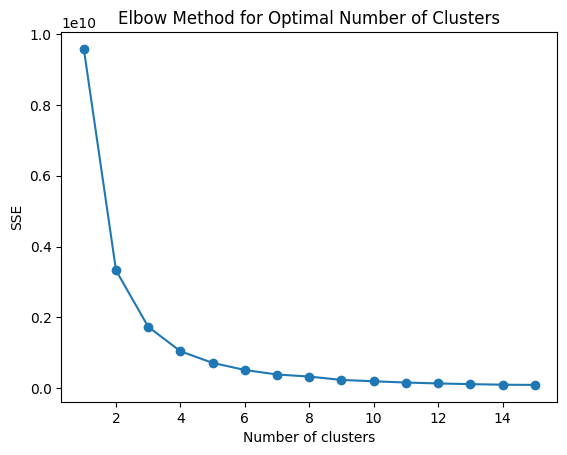

In [31]:
plt.plot(range(1, len(sse) + 1), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [32]:
kmeans = KMeans(n_clusters = 3, random_state = 10)
kmeans.fit(df)
cluster_labels = kmeans.labels_

df = df.assign(Cluster = cluster_labels)
df.head(30)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,CITY_Aaarhus,CITY_Allentown,...,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small,Cluster
0,30,95.70,2,2871.00,1,2,2003,95,0,0,...,1,0,0,0,0,0,0,0,1,2
1,34,81.35,5,2765.90,2,5,2003,95,0,0,...,1,0,0,0,0,0,0,0,1,2
2,41,94.74,2,3884.34,3,7,2003,95,0,0,...,1,0,0,0,0,0,0,1,0,0
3,45,83.26,6,3746.70,3,8,2003,95,0,0,...,1,0,0,0,0,0,0,1,0,0
4,49,100.00,14,5205.27,4,10,2003,95,0,0,...,1,0,0,0,0,0,0,1,0,0


In [33]:
df.head(30)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,CITY_Aaarhus,CITY_Allentown,...,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small,Cluster
0,30,95.70,2,2871.00,1,2,2003,95,0,0,...,1,0,0,0,0,0,0,0,1,2
1,34,81.35,5,2765.90,2,5,2003,95,0,0,...,1,0,0,0,0,0,0,0,1,2
2,41,94.74,2,3884.34,3,7,2003,95,0,0,...,1,0,0,0,0,0,0,1,0,0
3,45,83.26,6,3746.70,3,8,2003,95,0,0,...,1,0,0,0,0,0,0,1,0,0
4,49,100.00,14,5205.27,4,10,2003,95,0,0,...,1,0,0,0,0,0,0,1,0,0
5,36,96.66,1,3479.76,4,10,2003,95,0,0,...,1,0,0,0,0,0,0,1,0,0
6,29,86.13,9,2497.77,4,11,2003,95,0,0,...,1,0,0,0,0,0,0,0,1,2
7,48,100.00,1,5512.32,4,11,2003,95,0,0,...,1,0,0,0,0,0,0,1,0,0
8,22,98.57,2,2168.54,4,12,2003,95,0,0,...,1,0,0,0,0,0,0,0,1,2
9,41,100.00,14,4708.44,1,1,2004,95,0,0,...,1,0,0,0,0,0,0,1,0,0
